<a href="https://colab.research.google.com/github/Otter2022/RowdyDatathon24/blob/main/DatathonbabY!!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install beutifulsoup4
!pip install requests
!pip install pandas matplotlib seaborn cartopy
!pip install ffmpeg
!pip install plotly-geo==1.0.0
!pip install geopandas==0.8.1
!pip install pyshp==2.1.2
!pip install shapely==1.8.5



ERROR: Could not find a version that satisfies the requirement beutifulsoup4 (from versions: none)
ERROR: No matching distribution found for beutifulsoup4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=c57d4f37d8b81916f6a270dcb129fad20af3a8b736c8e5b83a6698f3cfc3d7fb
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.8/962.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Suc

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import concurrent.futures
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# def web_scrape_sighting_table(cur_type):
#   fall_years = []
#   spring_years = []
#   for i in range(1997, 2025):
#     fall_URL = f"https://journeynorth.org/sightings/querylist.html?map={cur_type}-fall&year={i}&season=fall"
#     spring_url = f"https://journeynorth.org/sightings/querylist.html?map={cur_type}-spring&year={i}&season=spring"

#     print(fall_URL)
#     print(spring_url)

#     fall_request = requests.get(fall_URL)
#     spring_request = requests.get(spring_url)

#     fall_soup = BeautifulSoup(fall_request.text, "html.parser")
#     spring_soup = BeautifulSoup(spring_request.text, "html.parser")

#     fall_table = fall_soup.find("table")
#     spring_table = spring_soup.find("table")

#     fall_df = pd.read_html(str(fall_table))[0]
#     spring_df = pd.read_html(str(spring_table))[0]

#     fall_years.append((i, fall_df))
#     spring_years.append((i, spring_df))

#   return fall_df, spring_df

def process_year(cur_type, year):
    fall_URL = f"https://journeynorth.org/sightings/querylist.html?map={cur_type}-fall&year={year}&season=fall"
    spring_url = f"https://journeynorth.org/sightings/querylist.html?map={cur_type}-spring&year={year}&season=spring"

    print(f"Fetching fall URL: {fall_URL}")
    print(f"Fetching spring URL: {spring_url}")

    fall_request = requests.get(fall_URL)
    spring_request = requests.get(spring_url)

    fall_soup = BeautifulSoup(fall_request.text, "html.parser")
    spring_soup = BeautifulSoup(spring_request.text, "html.parser")

    fall_table = fall_soup.find("table")
    spring_table = spring_soup.find("table")

    fall_df = pd.read_html(str(fall_table))[0]
    spring_df = pd.read_html(str(spring_table))[0]

    return (year, fall_df), (year, spring_df)

def web_scrape_sighting_table(cur_type):
    fall_years = []
    spring_years = []

    years = list(range(1997, 2025))

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_year, cur_type, year) for year in years]

        for future in concurrent.futures.as_completed(futures):
            fall_result, spring_result = future.result()
            fall_years.append(fall_result)
            spring_years.append(spring_result)

    return fall_years, spring_years


In [ ]:
types = ["monarch-egg", "monarch-other", "monarch-adult", "monarch-roost", "monarch-larva",  "monarch-captive"]
df_fall_pairs = []
df_spring_pairs = []

for i in types:
  x, y = web_scrape_sighting_table(i)
  df_fall_pairs.append(x)
  df_spring_pairs.append(y)


Fetching fall URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-fall&year=1997&season=fall
Fetching spring URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-spring&year=1997&season=spring
Fetching fall URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-fall&year=1998&season=fall
Fetching spring URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-spring&year=1998&season=spring
Fetching fall URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-fall&year=1999&season=fall
Fetching spring URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-spring&year=1999&season=spring
Fetching fall URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-fall&year=2000&season=fallFetching fall URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-fall&year=2001&season=fall
Fetching spring URL: https://journeynorth.org/sightings/querylist.html?map=monarch-egg-

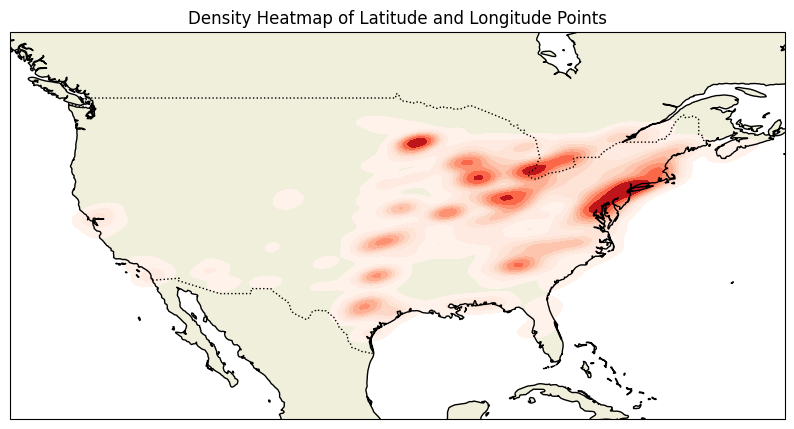

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation

plt.figure(figsize=(10, 6))

# Set up the map with Cartopy
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())  # North America bounds

# Add geographic features (land, coastlines, etc.)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


sns.kdeplot(
    x=df_fall_pairs[2][19][1]['Longitude'],
    y=df_fall_pairs[2][19][1]['Latitude'],
    fill=True,
    cmap="Reds",
    bw_adjust=0.5
)

plt.title('Density Heatmap of Latitude and Longitude Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as an image file
plt.savefig('static_heatmap.png')

# Display the plot
plt.show()

Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data or contour error: Contour levels must be increasing


Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data
Skipping year due to insufficient data or contour error: Contour levels must be increasing


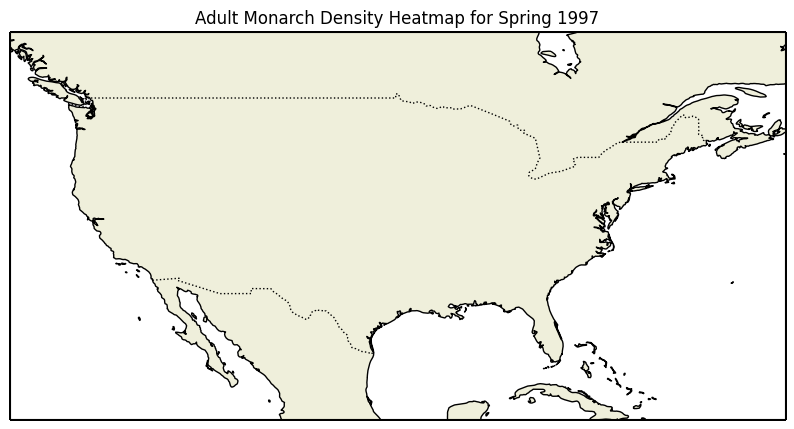

In [ ]:
import ffmpeg
ADULT_MONARCH_1997_2024 = []
for i in range(len(df_fall_pairs[2])):
  ADULT_MONARCH_1997_2024.append(df_spring_pairs[2][i][1])
  ADULT_MONARCH_1997_2024.append(df_fall_pairs[2][i][1])


def setup_map():
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())  # North America bounds
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    return ax

def update(frame):
    global ax
    ax.clear()  # Clear the previous heatmap
    ax = setup_map()  # Reset map with land outlines
    df = ADULT_MONARCH_1997_2024[frame]  # Get the DataFrame for the current year

    # Plot the KDE heatmap
    if df.shape[0] > 1:  # Ensure there is more than one data point
        # Plot the KDE heatmap
        try:
            sns.kdeplot(
                x=df['Longitude'],
                y=df['Latitude'],
                fill=True,
                cmap="Reds",
                bw_adjust=0.5,  # You can adjust this to smooth the plot
                ax=ax
            )
        except ValueError as e:
            print(f"Skipping year due to insufficient data or contour error: {e}")
    else:
        print(f"Skipping year due to insufficient data")

    # Add the year as a title
    if frame % 2 == 0:
      plt.title(f'Adult Monarch Density Heatmap for Spring {frame // 2 + 1997}')
    else:
      plt.title(f'Adult Monarch Density Heatmap for Fall {frame // 2 + 1997}')

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax = setup_map()

# Create the animation using FuncAnimation
anim = FuncAnimation(fig, update, frames=len(ADULT_MONARCH_1997_2024), repeat=False)

# Save the animation as an MP4 or GIF file
anim.save('heatmap_animation.mp4', writer='ffmpeg', fps=.75)  # Save as MP4 (requires ffmpeg)
# or
anim.save('heatmap_animation.gif', writer='imagemagick', fps=.75)
anim

In [ ]:
from shapely.geometry import Point
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load county shapefile (adjust the path to where your shapefile is located)
counties = gpd.read_file('/content/drive/MyDrive/Datathon/tl_2024_us_county.shp')

# Ensure the CRS (Coordinate Reference System) is correct (usually EPSG:4326 for lat/lon)
counties = counties.to_crs(epsg=4326)

In [ ]:
import pandas as pd

In [ ]:
df2014 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2014.csv')
df2014['Date'] = pd.to_datetime(df2014['Date'], errors='coerce')
fallDf2014 = df2014.loc[(df2014['Date'].dt.month >= 9) & (df2014['Date'].dt.month < 12)]
springDf2014= df2014.loc[(df2014['Date'].dt.month >= 3) & (df2014['Date'].dt.month < 6)]

df2015 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2015.csv')
df2015['Date'] = pd.to_datetime(df2015['Date'], errors='coerce')
fallDf2015 = df2015.loc[(df2015['Date'].dt.month >= 9) & (df2015['Date'].dt.month < 12)]
springDf2015= df2015.loc[(df2015['Date'].dt.month >= 3) & (df2015['Date'].dt.month < 6)]

df2016 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2016.csv')
df2016['Date'] = pd.to_datetime(df2016['Date'], errors='coerce')
fallDf2016 = df2016.loc[(df2016['Date'].dt.month >= 9) & (df2016['Date'].dt.month < 12)]
springDf2016 = df2016.loc[(df2016['Date'].dt.month >= 3) & (df2016['Date'].dt.month < 6)]

df2017 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2017.csv')
df2017['Date'] = pd.to_datetime(df2017['Date'], errors='coerce')
fallDf2017 = df2017.loc[(df2017['Date'].dt.month >= 9) & (df2017['Date'].dt.month < 12)]
springDf2017 = df2017.loc[(df2017['Date'].dt.month >= 3) & (df2017['Date'].dt.month < 6)]

df2018 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2018.csv')
df2018['Date'] = pd.to_datetime(df2018['Date'], errors='coerce')
fallDf2018 = df2018.loc[(df2018['Date'].dt.month >= 9) & (df2018['Date'].dt.month < 12)]
springDf2018 = df2018.loc[(df2018['Date'].dt.month >= 3) & (df2018['Date'].dt.month < 6)]

df2019 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2019.csv')
df2019['Date'] = pd.to_datetime(df2019['Date'], errors='coerce')
fallDf2019 = df2019.loc[(df2019['Date'].dt.month >= 9) & (df2019['Date'].dt.month < 12)]
springDf2019 = df2019.loc[(df2019['Date'].dt.month >= 3) & (df2019['Date'].dt.month < 6)]

df2020 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2020.csv')
df2020['Date'] = pd.to_datetime(df2020['Date'], errors='coerce')
fallDf2020 = df2020.loc[(df2020['Date'].dt.month >= 9) & (df2020['Date'].dt.month < 12)]
springDf2020 = df2020.loc[(df2020['Date'].dt.month >= 3) & (df2020['Date'].dt.month < 6)]

df2021 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2021.csv')
df2021['Date'] = pd.to_datetime(df2021['Date'], errors='coerce')
fallDf2021 = df2021.loc[(df2021['Date'].dt.month >= 9) & (df2021['Date'].dt.month < 12)]
springDf2021 = df2021.loc[(df2021['Date'].dt.month >= 3) & (df2021['Date'].dt.month < 6)]


df2022 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2022.csv')
df2022['Date'] = pd.to_datetime(df2022['Date'], errors='coerce')
fallDf2022 = df2022.loc[(df2022['Date'].dt.month >= 9) & (df2022['Date'].dt.month < 12)]
springDf2022 = df2022.loc[(df2022['Date'].dt.month >= 3) & (df2022['Date'].dt.month < 6)]

df2023 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2023.csv')
df2023['Date'] = pd.to_datetime(df2023['Date'], errors='coerce')
fallDf2023 = df2023.loc[(df2023['Date'].dt.month >= 9) & (df2023['Date'].dt.month < 12)]
springDf2023 = df2023.loc[(df2023['Date'].dt.month >= 3) & (df2023['Date'].dt.month < 6)]

df2024 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_aqi_by_county_2021.csv')
df2024['Date'] = pd.to_datetime(df2024['Date'], errors='coerce')
fallDf2024 = df2024.loc[(df2024['Date'].dt.month >= 9) & (df2024['Date'].dt.month < 12)]
springDf2024 = df2024.loc[(df2024['Date'].dt.month >= 3) & (df2024['Date'].dt.month < 6)]

dfFall= pd.concat([fallDf2014, fallDf2015, fallDf2016, fallDf2017, fallDf2018, fallDf2019, fallDf2020, fallDf2021, fallDf2022, fallDf2023, fallDf2024], ignore_index=True)
dfFall['Season'] = 'Fall'
dfSpring = pd.concat([springDf2014, springDf2015, springDf2016, springDf2017, springDf2018, springDf2019, springDf2020, springDf2021, springDf2022, springDf2023, springDf2024], ignore_index=True)
dfSpring['Season'] = 'Spring'
df = pd.concat([dfSpring, dfFall])


dfTemp2014 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2014.csv')
dfTemp2014['Date Local'] = pd.to_datetime(dfTemp2014['Date Local'], errors='coerce')
fallDfTemp2014 = dfTemp2014.loc[(dfTemp2014['Date Local'].dt.month >= 9) & (dfTemp2014['Date Local'].dt.month < 12)]
springDfTemp2014 = dfTemp2014.loc[(dfTemp2014['Date Local'].dt.month >= 3) & (dfTemp2014['Date Local'].dt.month < 6)]

dfTemp2015 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2015.csv')
dfTemp2015['Date Local'] = pd.to_datetime(dfTemp2015['Date Local'], errors='coerce')
fallDfTemp2015 = dfTemp2015.loc[(dfTemp2015['Date Local'].dt.month >= 9) & (dfTemp2015['Date Local'].dt.month < 12)]
springDfTemp2015 = dfTemp2015.loc[(dfTemp2015['Date Local'].dt.month >= 3) & (dfTemp2015['Date Local'].dt.month < 6)]

dfTemp2016 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2016.csv')
dfTemp2016['Date Local'] = pd.to_datetime(dfTemp2016['Date Local'], errors='coerce')
fallDfTemp2016 = dfTemp2016.loc[(dfTemp2016['Date Local'].dt.month >= 9) & (dfTemp2016['Date Local'].dt.month < 12)]
springDfTemp2016 = dfTemp2016.loc[(dfTemp2016['Date Local'].dt.month >= 3) & (dfTemp2016['Date Local'].dt.month < 6)]

dfTemp2017 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2017.csv')
dfTemp2017['Date Local'] = pd.to_datetime(dfTemp2017['Date Local'], errors='coerce')
fallDfTemp2017 = dfTemp2017.loc[(dfTemp2017['Date Local'].dt.month >= 9) & (dfTemp2017['Date Local'].dt.month < 12)]
springDfTemp2017 = dfTemp2017.loc[(dfTemp2017['Date Local'].dt.month >= 3) & (dfTemp2017['Date Local'].dt.month < 6)]

dfTemp2018 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2018.csv')
dfTemp2018['Date Local'] = pd.to_datetime(dfTemp2018['Date Local'], errors='coerce')
fallDfTemp2018 = dfTemp2018.loc[(dfTemp2018['Date Local'].dt.month >= 9) & (dfTemp2018['Date Local'].dt.month < 12)]
springDfTemp2018 = dfTemp2018.loc[(dfTemp2018['Date Local'].dt.month >= 3) & (dfTemp2018['Date Local'].dt.month < 6)]

dfTemp2019 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2019.csv')
dfTemp2019['Date Local'] = pd.to_datetime(dfTemp2019['Date Local'], errors='coerce')
fallDfTemp2019 = dfTemp2019.loc[(dfTemp2019['Date Local'].dt.month >= 9) & (dfTemp2019['Date Local'].dt.month < 12)]
springDfTemp2019 = dfTemp2019.loc[(dfTemp2019['Date Local'].dt.month >= 3) & (dfTemp2019['Date Local'].dt.month < 6)]

dfTemp2020 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2020.csv')
dfTemp2020['Date Local'] = pd.to_datetime(dfTemp2020['Date Local'], errors='coerce')
fallDfTemp2020 = dfTemp2020.loc[(dfTemp2020['Date Local'].dt.month >= 9) & (dfTemp2020['Date Local'].dt.month < 12)]
springDfTemp2020 = dfTemp2020.loc[(dfTemp2020['Date Local'].dt.month >= 3) & (dfTemp2020['Date Local'].dt.month < 6)]

dfTemp2021 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2021.csv')
dfTemp2021['Date Local'] = pd.to_datetime(dfTemp2021['Date Local'], errors='coerce')
fallDfTemp2021 = dfTemp2021.loc[(dfTemp2021['Date Local'].dt.month >= 9) & (dfTemp2021['Date Local'].dt.month < 12)]
springDfTemp2021 = dfTemp2021.loc[(dfTemp2021['Date Local'].dt.month >= 3) & (dfTemp2021['Date Local'].dt.month < 6)]

dfTemp2022 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2022.csv')
dfTemp2022['Date Local'] = pd.to_datetime(dfTemp2022['Date Local'], errors='coerce')
fallDfTemp2022 = dfTemp2022.loc[(dfTemp2022['Date Local'].dt.month >= 9) & (dfTemp2022['Date Local'].dt.month < 12)]
springDfTemp2022 = dfTemp2022.loc[(dfTemp2022['Date Local'].dt.month >= 3) & (dfTemp2022['Date Local'].dt.month < 6)]

dfTemp2023 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2023.csv')
dfTemp2023['Date Local'] = pd.to_datetime(dfTemp2023['Date Local'], errors='coerce')
fallDfTemp2023 = dfTemp2023.loc[(dfTemp2023['Date Local'].dt.month >= 9) & (dfTemp2023['Date Local'].dt.month < 12)]
springDfTemp2023 = dfTemp2023.loc[(dfTemp2023['Date Local'].dt.month >= 3) & (dfTemp2023['Date Local'].dt.month < 6)]

dfTemp2024 = pd.read_csv('/content/drive/MyDrive/Datathon/daily_TEMP_2024.csv')
dfTemp2024['Date Local'] = pd.to_datetime(dfTemp2024['Date Local'], errors='coerce')
fallDfTemp2024 = dfTemp2024.loc[(dfTemp2024['Date Local'].dt.month >= 9) & (dfTemp2024['Date Local'].dt.month < 12)]
springDfTemp2024 = dfTemp2024.loc[(dfTemp2024['Date Local'].dt.month >= 3) & (dfTemp2024['Date Local'].dt.month < 6)]


dfFallTemp= pd.concat([fallDfTemp2014, fallDfTemp2015, fallDfTemp2016, fallDfTemp2017, fallDfTemp2018, fallDfTemp2019, fallDfTemp2020, fallDfTemp2021, fallDfTemp2022, fallDfTemp2023, fallDfTemp2024], ignore_index=True)
dfFallTemp['Season'] = 'Fall'
dfSpringTemp = pd.concat([springDfTemp2014, springDfTemp2015, springDfTemp2016, springDfTemp2017, springDfTemp2018, springDfTemp2019, springDfTemp2020, springDfTemp2021, springDfTemp2022, springDfTemp2023, springDfTemp2024], ignore_index=True)
dfSpringTemp['Season'] = 'Spring'
dfTemp = pd.concat([dfSpringTemp, dfFallTemp])

In [ ]:
print(dfTemp.columns)
print(df.columns)

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change', 'Season'],
      dtype='object')
Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting', 'Season'],
      dtype='object')


In [ ]:
# Ensure 'State Code' and 'County Code' are integers in both DataFrames
df['State Code'] = df['State Code'].astype(str)
df['County Code'] = df['County Code'].astype(str)
dfTemp['State Code'] = dfTemp['State Code'].astype(str)
dfTemp['County Code'] = dfTemp['County Code'].astype(str)

In [ ]:
# Convert 'Date' columns to datetime format to ensure proper merging
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
dfTemp['Date Local'] = pd.to_datetime(dfTemp['Date Local'], errors='coerce')  # This assumes 'Date Local' was renamed to 'Date'

In [ ]:
print(df.dtypes)
print(dfTemp.dtypes)

State Name                           object
county Name                          object
State Code                           object
County Code                          object
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
Season                               object
dtype: object
State Code                     object
County Code                    object
Site Num                        int64
Parameter Code                  int64
POC                             int64
Latitude                      float64
Longitude                     float64
Datum                          object
Parameter Name                 object
Sample Duration                object
Pollutant Standard            float64
Date Local             datetime64[ns]
Units of Measure               object
Event Ty

In [ ]:
# Check for missing values in key columns before merging
print(df[['State Code', 'County Code', 'Date']].isnull().sum())
print(dfTemp[['State Code', 'County Code', 'Date Local']].isnull().sum())

State Code     0
County Code    0
Date           0
dtype: int64
State Code     0
County Code    0
Date Local     0
dtype: int64


In [ ]:
print(df.columns)  # Replace 'left_df' with the name of your left DataFrame


Index(['state name', 'county name', 'state code', 'county code', 'date', 'aqi',
       'category', 'defining parameter', 'defining site',
       'number of sites reporting', 'season'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.lower()
dfTemp.columns = dfTemp.columns.str.lower()

In [ ]:
print(dfTemp.columns)

Index(['state code', 'county code', 'site num', 'parameter code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter name', 'sample duration',
       'pollutant standard', 'date', 'units of measure', 'event type',
       'observation count', 'observation percent', 'arithmetic mean',
       '1st max value', '1st max hour', 'aqi', 'method code', 'method name',
       'local site name', 'address', 'state name', 'county name', 'city name',
       'cbsa name', 'date of last change', 'season'],
      dtype='object')


In [ ]:
print(dfTemp['arithmetic mean'])

0         57
1         64
2         38
3         35
4         48
          ..
802824    26
802825    25
802826    25
802827    29
802828    24
Name: arithmetic mean, Length: 1656733, dtype: int64


In [ ]:
# Convert date columns to datetime if necessary
# Convert 'Date Local' in dfTemp to 'Date' to match with df
dfTemp.rename(columns={'Date Local': 'Date'}, inplace=True)

dfTemp['arithmetic mean'] = dfTemp['arithmetic mean'].round().astype(int)

df_combined = pd.merge(df,
                       dfTemp[['state name', 'county name', 'date', 'arithmetic mean']],
                       how='left',  # Use 'left' to retain all rows from df (AQI data)
                       on=['state name', 'county name', 'date'])


df_combined.rename(columns={'arithmetic mean': 'temperature'}, inplace=True)
# Print the first few rows of the combined DataFrame
print(df_combined['temperature'].count())
print(df_combined['temperature'].isna().sum())
df_cleaned = df_combined.dropna(subset=['temperature'])


1722822
997054


In [ ]:
print(df_cleaned.columns)

Index(['state name', 'county name', 'state code', 'county code', 'date', 'aqi',
       'category', 'defining parameter', 'defining site',
       'number of sites reporting', 'season', 'temperature'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df_combined' is your DataFrame
df = df_cleaned.copy()

# Add some date-based feature engineering if you have a date column
# df['month'] = pd.to_datetime(df['date']).dt.month
# df['year'] = pd.to_datetime(df['date']).dt.year
# df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek

# Select features and target
features = ['state code', 'county code', 'season', 'temperature']  # Add 'month', 'year', 'day_of_week' if needed
target = 'number of sites reporting'

# Drop rows with missing values in the target column
df = df.dropna(subset=[target])

# Separate features and target
X = df[features]
y = df[target]

# Preprocess categorical and numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['season']),
        ('num', StandardScaler(), ['temperature'])  # Scaling temperature
    ],
    remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and a Random Forest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Squared Error: 1.821998215033843
R² Score: 0.950035489703108


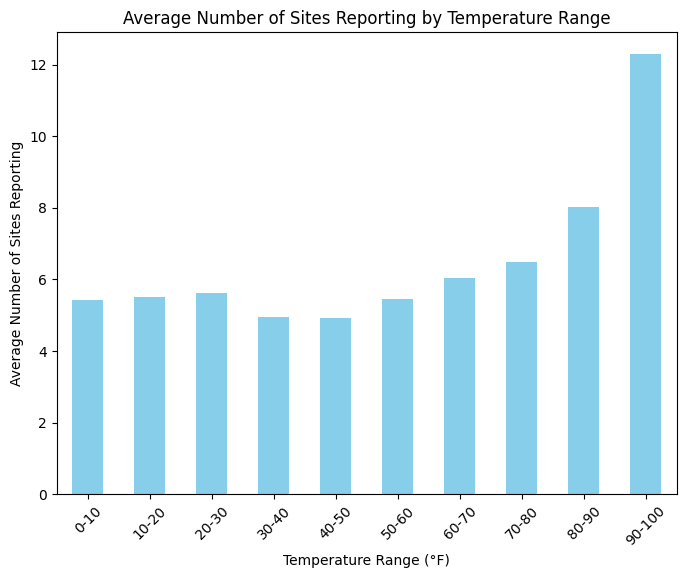

In [ ]:
# Create temperature bins (adjust the bin ranges as needed)
import matplotlib.pyplot as plt

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust the ranges to your data
df['temperature_bin'] = pd.cut(df['temperature'], bins=bins, labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

# Group by temperature_bin and calculate the average number of sites reporting
temperature_group = df.groupby('temperature_bin')['number of sites reporting'].mean()

# Plot the bar graph
plt.figure(figsize=(8, 6))
temperature_group.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Average Number of Sites Reporting by Temperature Range')
plt.xlabel('Temperature Range (°F)')
plt.ylabel('Average Number of Sites Reporting')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

In [ ]:
dfCo = pd.read_csv('/content/drive/MyDrive/Datathon/CO_data.csv')
dfOzone = pd.read_csv('/content/drive/MyDrive/Datathon/Ozone_data.csv')
dfPm = pd.read_csv('/content/drive/MyDrive/Datathon/PM2.5_data.csv')
dfMonarchSightings1 = pd.read_csv('/content/drive/MyDrive/Datathon/MonarchSightings1.csv')
dfMonarchSightings2 = pd.read_csv('/content/drive/MyDrive/Datathon/MonarchSightings2.csv')
dfMonarchSightings = pd.concat([dfMonarchSightings1, dfMonarchSightings2], ignore_index=True)
print(dfPm.columns)
print(dfMonarchSightings1.columns)


Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Season'],
      dtype='object')
Index(['Index', 'Date', 'City', 'State', 'Latitude', 'Longitude',
       'Monarch Count', 'None', 'Year'],
      dtype='object')


In [ ]:
# Step 2: Standardize column names if needed
# Assuming 'State' in dfMonarchSightings should match 'State Name' in dfPm
dfMonarchSightings.rename(columns={'State': 'State Name', 'City': 'county Name'}, inplace=True)

# Step 3: Merge the datasets on common columns: 'State Name', 'county Name', and 'Date'
df_combined = pd.merge(dfMonarchSightings, dfPm, on=['State Name', 'county Name', 'Date'], how='inner')

# Step 4: Handle missing data if needed (optional)
df_combined.dropna(subset=['Monarch Count', 'AQI', 'Category'], inplace=True)  # Drop rows with missing important data

# Check the combined dataset
print(df_combined.head())  # Display the first few rows of the combined dataset
print(df_combined.shape)   # Check the shape of the combined dataset

Empty DataFrame
Columns: [Index, Date, county Name, State Name, Latitude, Longitude, Monarch Count, None, Year, State Code, County Code, AQI, Category, Defining Parameter, Season]
Index: []
(0, 15)
